In [28]:
import pandas as pd
import numpy as np
from urllib import request
from bs4 import BeautifulSoup

import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By

import math
import time

In [29]:
df_dict = dict()
def movie_review_df(url,name): # name: 영화 이름으로 데이터프레임 dict 안에 넣음 / 메가박스용
    driver = webdriver.Chrome('chromedriver')
    driver.get(url)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    result = []
    result_charm = []
    result2 = []
    result2_charm = []
    for i in range(10): # 10페이지 까지
        if (i!=0):
            btn = driver.find_element(By.CSS_SELECTOR,f'#contentData > div > div.movie-idv-story > nav > a:nth-child({i+1})')# 버튼 생성
            btn.click()# 클릭
        soup = BeautifulSoup(driver.page_source,'html.parser')
        page = soup.select_one('#contentData > div > div.movie-idv-story > ul')
        result.append(page.findAll('div',{'class':'story-txt'}))
        result_charm.append(page.findAll('div',{'class':'story-recommend'}))
        time.sleep(0.5)

    for i in range(10,math.ceil(int(driver.find_element(By.CSS_SELECTOR,'#cnt1').text.replace(',',''))/10)): # 총 개수 / 10 한 몫만큼의 페이지 존재, 검색 지금은 2~82페이지
        if (i%10==0 and i>0):
            btn = driver.find_element(By.CSS_SELECTOR,'#contentData > div > div.movie-idv-story > nav > a.control.next') # 10도달 시 다음
            btn.click()
        elif (i%10!=1):
            btn = driver.find_element(By.CSS_SELECTOR,f'#contentData > div > div.movie-idv-story > nav > a:nth-child({i%10+3})')# 버튼 생성
            btn.click()# 클릭
        soup = BeautifulSoup(driver.page_source,'html.parser')
        page = soup.select_one('#contentData > div > div.movie-idv-story > ul')
        result2.append(page.findAll('div',{'class':'story-txt'}))
        result2_charm.append(page.findAll('div',{'class':'story-recommend'}))
        print(f'{i} complete')
        time.sleep(0.3)


    result3 = result+result2 # 두 결과 합치기(댓글)
    result_charm3 = result_charm + result2_charm # 두 결과 합치기(매력)

    charm3= []
    for i in result_charm3: # 매력 포인트 댓글 별로 나누기(두 개 이상 입력한 경우가 있어 적용)
        for j in i:
            if len(j)>2:
                temp = []
                for k in j.findAll('em'):
                    temp.append(k.text)
                charm3.append(temp)
            else:
                charm3.append(j.text)


    from functools import reduce
    result4 = reduce(lambda x,y:x+y,result3) # 댓글 내 리스트 전부 합치기

    df = pd.DataFrame(data=(result4,charm3)).T # 데이터 프레임 생성
    df_dict[name]=df

In [30]:
movie_review_df('https://www.megabox.co.kr/movie-detail/comment?rpstMovieNo=22059000','정직한후보2')

10 complete
11 complete
12 complete
13 complete
14 complete
15 complete
16 complete
17 complete
18 complete
19 complete
20 complete
21 complete
22 complete
23 complete
24 complete
25 complete
26 complete
27 complete
28 complete
29 complete
30 complete
31 complete
32 complete
33 complete
34 complete
35 complete
36 complete
37 complete
38 complete
39 complete
40 complete
41 complete
42 complete
43 complete
44 complete
45 complete
46 complete
47 complete
48 complete
49 complete
50 complete
51 complete
52 complete
53 complete
54 complete
55 complete
56 complete
57 complete
58 complete
59 complete
60 complete
61 complete
62 complete
63 complete
64 complete
65 complete
66 complete
67 complete
68 complete
69 complete
70 complete
71 complete
72 complete
73 complete
74 complete
75 complete
76 complete
77 complete
78 complete
79 complete
80 complete
81 complete
82 complete
83 complete
84 complete
85 complete
86 complete
87 complete
88 complete
89 complete
90 complete
91 complete
92 complete
93 c

In [8]:
from collections import Counter

In [9]:
charm = []
for i in df_dict['정직한후보2'].loc[:,1].tolist():
    if type(i)==list:
        for j in i:
            charm.append(j.strip())
    else:
        charm.append(i.strip())
charm_count = Counter(charm)

In [12]:
c_list = []
c_list.append(charm_count['배우'])
c_list.append(charm_count['연출'])
c_list.append(charm_count['스토리'])
c_list.append(charm_count['영상미'])
c_list.append(charm_count['OST'])

In [13]:
c_list = [*c_list, c_list[0]]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_loc = 'C:/Windows/Fonts/H2PORM.TTF'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [15]:
categories =  ['배우','연출','스토리','영상미','OST']
categories = [*categories, categories[0]]

In [26]:
label_loc = [np.pi/2-2*np.pi/5,np.pi/2,np.pi/2+2*np.pi/5,np.pi/2+4*np.pi/5,np.pi/2+6*np.pi/5,np.pi/2-2*np.pi/5]

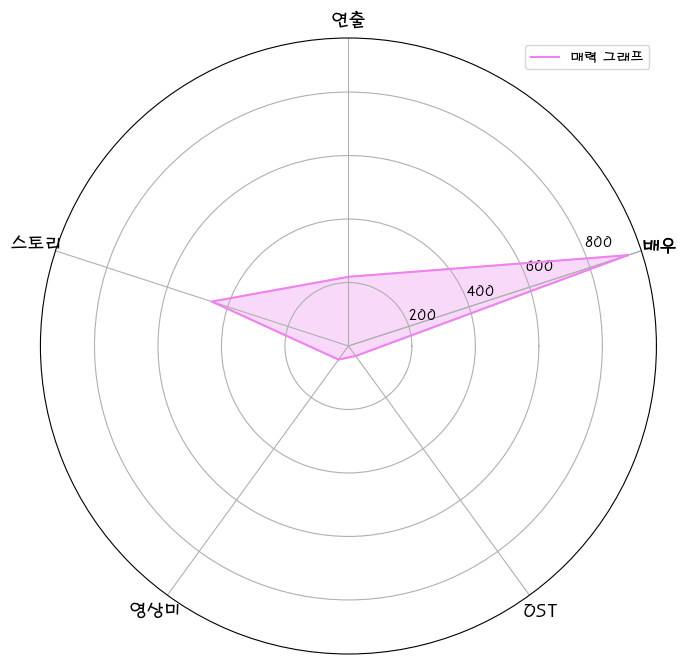

In [27]:
plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)
ax.plot(label_loc, c_list, label='매력 그래프', color='violet')
ax.fill(label_loc, c_list, color='violet', alpha=0.3)
ax.legend()
plt.show()